<a href="https://colab.research.google.com/github/lucas-porto/imersao_dados_2_alura/blob/main/Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings as wrns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  r2_score


wrns.filterwarnings("ignore")

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(fonte)

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

#definindo parâmentros de teste
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

#retirando todos os dados NaN (not a number)
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[prova_saida]

x = notas_entrada
y = notas_saida 


SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [2]:
modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)


6604.41530621957

In [3]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)

6082.353612605279

In [4]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()


In [5]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.722549536804 - 7100.7327797807375


In [6]:
resultados["test_score"]*-1

array([6118.6911947 , 6536.09830186, 6338.64260896, 6456.70685686,
       6234.97203593, 6794.25120283, 6713.45694262, 6693.04880297,
       6610.58461646, 7085.82408339])

In [7]:
#criando uma função pára calcular os intervalos de confiança


def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.741842392759 - 6250.793292491384


In [9]:
#criando uma função para mudar a quantidade de níveis da árvore
#fiz uma pequena alteração na fórmula de print.

def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nível = {nivel}  |  Treino = {(resultados['train_score']*-1).mean()}  |  Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Nível = 4  |  Treino = 5760.834451245899  |  Teste = 5815.707286597402


In [10]:
for i in range(1,21):
    regressor_arvore(i)

Nível = 1  |  Treino = 7844.952652412207  |  Teste = 7857.871770206351
Nível = 2  |  Treino = 6527.783475408351  |  Teste = 6556.886287657656
Nível = 3  |  Treino = 6021.275229419075  |  Teste = 6054.767567442072
Nível = 4  |  Treino = 5760.834451245899  |  Teste = 5815.707286597402
Nível = 5  |  Treino = 5598.158955426787  |  Teste = 5675.196789060744
Nível = 6  |  Treino = 5469.677369145869  |  Teste = 5593.304363812442
Nível = 7  |  Treino = 5369.458309852721  |  Teste = 5541.646599457925
Nível = 8  |  Treino = 5276.16965707928  |  Teste = 5542.053091078966
Nível = 9  |  Treino = 5166.713159932668  |  Teste = 5608.390265709719
Nível = 10  |  Treino = 5022.598049115693  |  Teste = 5761.4934268457555
Nível = 11  |  Treino = 4833.560706021637  |  Teste = 5955.331403579403
Nível = 12  |  Treino = 4598.125022484774  |  Teste = 6217.553668629227
Nível = 13  |  Treino = 4316.3791662866815  |  Teste = 6521.403312280134
Nível = 14  |  Treino = 4000.6209880837496  |  Teste = 6853.984106997142

# Desafios

Desafio 01: Pesquisar sobre intervalo de confiança (Quem quiser discutir no Discord, estaremos lá)

Desafio 02: Testar com outros parâmetros da árvore de decisão

Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

Desafio 04: Pesquisar o que é o problema de underfit.

Desafio 05: Plotar um gráfico com test_score e train_test.

## Desafio 02: Testar com outros parâmetros da árvore de decisão

In [11]:
def regressor_arvore_splitter(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(splitter='random', max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nível = {nivel}  |  Treino = {(resultados['train_score']*-1).mean()}  |  Teste = {(resultados['test_score']*-1).mean()}")



In [12]:
for i in range(1,21):
    regressor_arvore_splitter(i)

Nível = 1  |  Treino = 10034.338306546062  |  Teste = 10075.107697725836
Nível = 2  |  Treino = 8409.259207233375  |  Teste = 8429.934826473534
Nível = 3  |  Treino = 7672.959180764663  |  Teste = 7689.899047962572
Nível = 4  |  Treino = 7009.5930795237455  |  Teste = 7007.010476035968
Nível = 5  |  Treino = 6486.849353647543  |  Teste = 6496.426421458465
Nível = 6  |  Treino = 6182.095857131235  |  Teste = 6198.744206041205
Nível = 7  |  Treino = 6064.189811442013  |  Teste = 6120.297674544248
Nível = 8  |  Treino = 5811.853432207414  |  Teste = 5877.478817058702
Nível = 9  |  Treino = 5699.992403790364  |  Teste = 5813.684141369803
Nível = 10  |  Treino = 5549.912405332774  |  Teste = 5752.853577721682
Nível = 11  |  Treino = 5396.7815114029145  |  Teste = 5688.571784240373
Nível = 12  |  Treino = 5212.754953398728  |  Teste = 5759.2761470476635
Nível = 13  |  Treino = 5093.835083046634  |  Teste = 5851.902438836298
Nível = 14  |  Treino = 4935.333086019465  |  Teste = 5933.405886914

In [13]:
def regressor_arvore_criterion(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(criterion='friedman_mse', max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nível = {nivel}  |  Treino = {(resultados['train_score']*-1).mean()}  |  Teste = {(resultados['test_score']*-1).mean()}")



In [14]:
for i in range(1,21):
    regressor_arvore_criterion(i)

Nível = 1  |  Treino = 7844.952652412207  |  Teste = 7857.871770206351
Nível = 2  |  Treino = 6527.783475408351  |  Teste = 6556.886287657656
Nível = 3  |  Treino = 6021.275229419075  |  Teste = 6054.767567442072
Nível = 4  |  Treino = 5760.834451245899  |  Teste = 5815.707286597402
Nível = 5  |  Treino = 5598.158955426787  |  Teste = 5675.196789060744
Nível = 6  |  Treino = 5469.677369145869  |  Teste = 5593.304363812442
Nível = 7  |  Treino = 5369.458309852721  |  Teste = 5541.646599457925
Nível = 8  |  Treino = 5276.16965707928  |  Teste = 5542.053091078966
Nível = 9  |  Treino = 5166.713159932668  |  Teste = 5606.742812619867
Nível = 10  |  Treino = 5022.598049115693  |  Teste = 5761.422452575385
Nível = 11  |  Treino = 4833.560706021637  |  Teste = 5956.160225439788
Nível = 12  |  Treino = 4598.125022484774  |  Teste = 6215.407469403728
Nível = 13  |  Treino = 4316.3791662866815  |  Teste = 6516.13879708975
Nível = 14  |  Treino = 4000.6209880837496  |  Teste = 6851.982155244305
N

In [15]:
def regressor_arvore_max_feat(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_features='log2', max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes,
                                scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nível = {nivel}  |  Treino = {(resultados['train_score']*-1).mean()}  |  Teste = {(resultados['test_score']*-1).mean()}")


In [16]:
for i in range(1,21):
    regressor_arvore_max_feat(i)

Nível = 1  |  Treino = 7977.850785538653  |  Teste = 7989.846620477476
Nível = 2  |  Treino = 6690.842869099799  |  Teste = 6730.028392780218
Nível = 3  |  Treino = 6123.776290803577  |  Teste = 6142.8604260881575
Nível = 4  |  Treino = 5855.747621318955  |  Teste = 5907.469840621638
Nível = 5  |  Treino = 5669.69198800822  |  Teste = 5728.72033778391
Nível = 6  |  Treino = 5541.457892114851  |  Teste = 5630.915068753371
Nível = 7  |  Treino = 5424.238373034781  |  Teste = 5572.194045116861
Nível = 8  |  Treino = 5327.086639209165  |  Teste = 5571.996085778521
Nível = 9  |  Treino = 5210.776036972252  |  Teste = 5614.277599987135
Nível = 10  |  Treino = 5070.625685638525  |  Teste = 5734.360620469545
Nível = 11  |  Treino = 4897.253617904204  |  Teste = 5855.295831727374
Nível = 12  |  Treino = 4675.329826019932  |  Teste = 6111.984376335367
Nível = 13  |  Treino = 4399.82098802411  |  Teste = 6383.08428748503
Nível = 14  |  Treino = 4082.4526449877267  |  Teste = 6760.125887231933
Nív

In [17]:
def comparar_parametros(nivel):
    regressor_arvore(nivel)
    regressor_arvore_splitter(nivel)
    regressor_arvore_criterion(nivel)
    regressor_arvore_max_feat(nivel)


In [18]:
comparar_parametros(9)

Nível = 9  |  Treino = 5166.713159932668  |  Teste = 5608.390265709719
Nível = 9  |  Treino = 5699.992403790364  |  Teste = 5813.684141369803
Nível = 9  |  Treino = 5166.713159932668  |  Teste = 5606.742812619867
Nível = 9  |  Treino = 5210.776036972252  |  Teste = 5614.277599987135


## Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
regressor_arvore_grid = DecisionTreeRegressor()

# Usamos o instanciamento dos parâmetros de maneira básica, com ajuste manuais

#criamos os parâmetros para tunning

parametros = {'max_depth':[1,40],
              'min_samples_leaf':[1,40],
              'min_samples_split':[2,10],
              'splitter':['best','random'],
              'max_features': ['auto', 'sqrt', 'log2']}


grid = GridSearchCV(estimator = regressor_arvore_grid, param_grid = parametros)

In [21]:
grid.fit(x_treino,y_treino)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_

In [22]:
grid.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 40,
 'min_samples_split': 2,
 'splitter': 'random'}

In [23]:
regressor_arvore_grid_melhor = grid.best_estimator_

In [24]:
regressor_arvore_grid_melhor_result = regressor_arvore_grid_melhor.predict(x_teste)

In [27]:
mean_squared_error(y_teste, regressor_arvore_grid_melhor_result)

5660.296313644545

In [30]:
r2_score(y_teste, regressor_arvore_grid_melhor_result)

0.5306968718658249

## Desafio 05: Plotar um gráfico com test_score e train_test.

In [76]:
#Vamos alterar o 1 código e plotar o gráfico proposto para cada um.

#primeiro temos que criar uma lista que receberá os dados de teste e de treino.

result_teste=[]

result_treino=[]


def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    #print(f"Nível = {nivel}  |  Treino = {(resultados['train_score']*-1).mean()}  |  Teste = {(resultados['test_score']*-1).mean()}")
    
    #irei comentar para não printar a cada iteração
    #fazendo o preenchimento da lista
    result_teste.append((resultados['test_score']*-1).mean())
    result_treino.append((resultados['train_score']*-1).mean())





In [77]:
for i in range(1,21):
  regressor_arvore(i)

Nível = 1  |  Treino = 7844.952652412207  |  Teste = 7857.871770206351
Nível = 2  |  Treino = 6527.783475408351  |  Teste = 6556.886287657656
Nível = 3  |  Treino = 6021.275229419075  |  Teste = 6054.767567442072
Nível = 4  |  Treino = 5760.834451245899  |  Teste = 5815.707286597402
Nível = 5  |  Treino = 5598.158955426787  |  Teste = 5675.196789060744
Nível = 6  |  Treino = 5469.677369145869  |  Teste = 5593.304363812442
Nível = 7  |  Treino = 5369.458309852721  |  Teste = 5541.646599457925
Nível = 8  |  Treino = 5276.16965707928  |  Teste = 5542.053091078966
Nível = 9  |  Treino = 5166.713159932668  |  Teste = 5608.390265709719
Nível = 10  |  Treino = 5022.598049115693  |  Teste = 5761.4934268457555
Nível = 11  |  Treino = 4833.560706021637  |  Teste = 5955.331403579403
Nível = 12  |  Treino = 4598.125022484774  |  Teste = 6217.553668629227
Nível = 13  |  Treino = 4316.3791662866815  |  Teste = 6521.403312280134
Nível = 14  |  Treino = 4000.6209880837496  |  Teste = 6853.984106997142

In [82]:
pd_result_arvore = pd.DataFrame()
pd_result_arvore['Index'] = range(1,21)
pd_result_arvore['Treino'] = result_treino
pd_result_arvore['Teste'] = result_teste


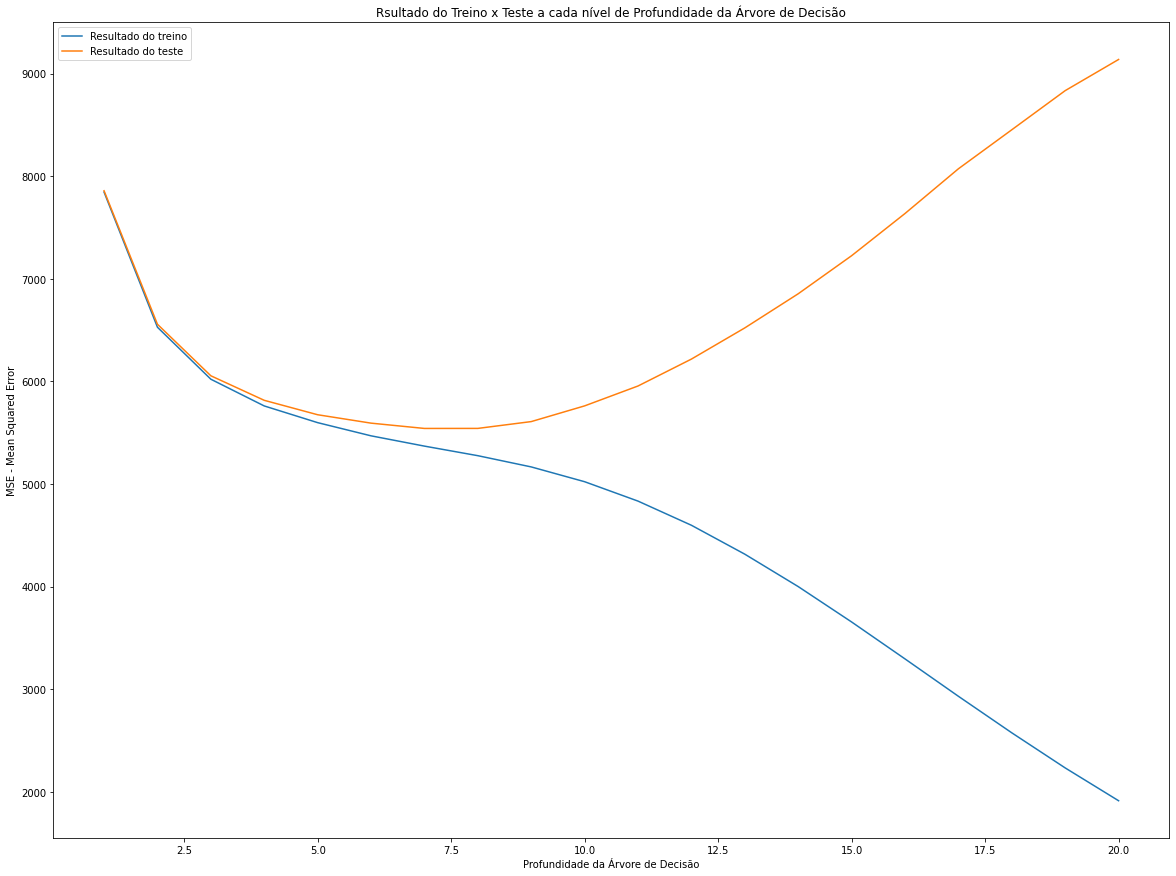

In [84]:
plt.figure(figsize=(20,15))
plt.plot(pd_result_arvore['Index'], pd_result_arvore['Treino'] , pd_result_arvore['Index'], pd_result_arvore['Teste'])
plt.title('Rsultado do Treino x Teste a cada nível de Profundidade da Árvore de Decisão')
plt.xlabel('Profundidade da Árvore de Decisão')
plt.ylabel('MSE - Mean Squared Error')
plt.legend(['Resultado do treino','Resultado do teste'])

Neste caso fica bem claro como o overfit se comporta. Conforme nosso erro vai diminuindo com o treino, o erro no teste começa a subir muito mais rapidamente. Esse é um dos grandes problemas a ter-se atenção quando validando as hipóteses apenas com medidas de erros.